In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1509 non-null   int64         
 1   Title              1509 non-null   object        
 2   Release Date       1509 non-null   datetime64[ns]
 3   Team               1508 non-null   object        
 4   Rating             1497 non-null   float64       
 5   Times Listed       1509 non-null   object        
 6   Number of Reviews  1509 non-null   object        
 7   Genres             1509 non-null   object        
 8   Summary            1509 non-null   object        
 9   Reviews            1509 non-null   object        
 10  Plays              1509 non-null   object        
 11  Playing            1509 non-null   object        
 12  Backlogs           1509 non-null   object        
 13  Wishlist           1509 non-null   object        
dtypes: datetime64

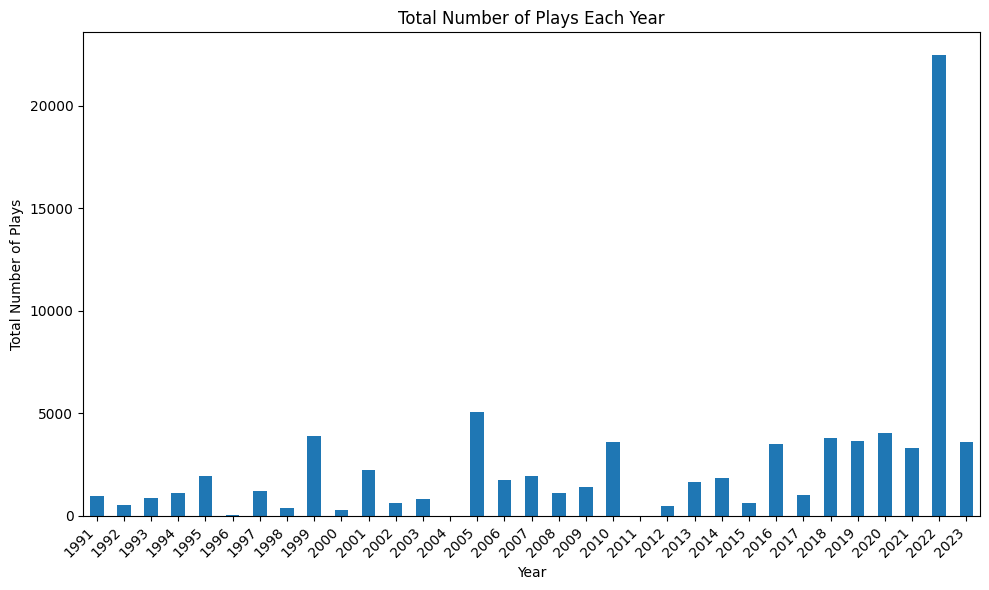

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# TODO: add scrollbar for time range
df['Plays'] = pd.to_numeric(df['Plays'], errors='coerce')
df = df[df['Release Date'].dt.year > 1990]


df_filtered = df[df['Release Date'].dt.year <= 2023]

# TODO: break down each bar by genre, make it interactive so you can limit genres being displayed
total_plays_per_year = df_filtered.groupby(df_filtered['Release Date'].dt.year)['Plays'].sum()

plt.figure(figsize=(10, 6))
total_plays_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Number of Plays')
plt.title('Total Number of Plays Each Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


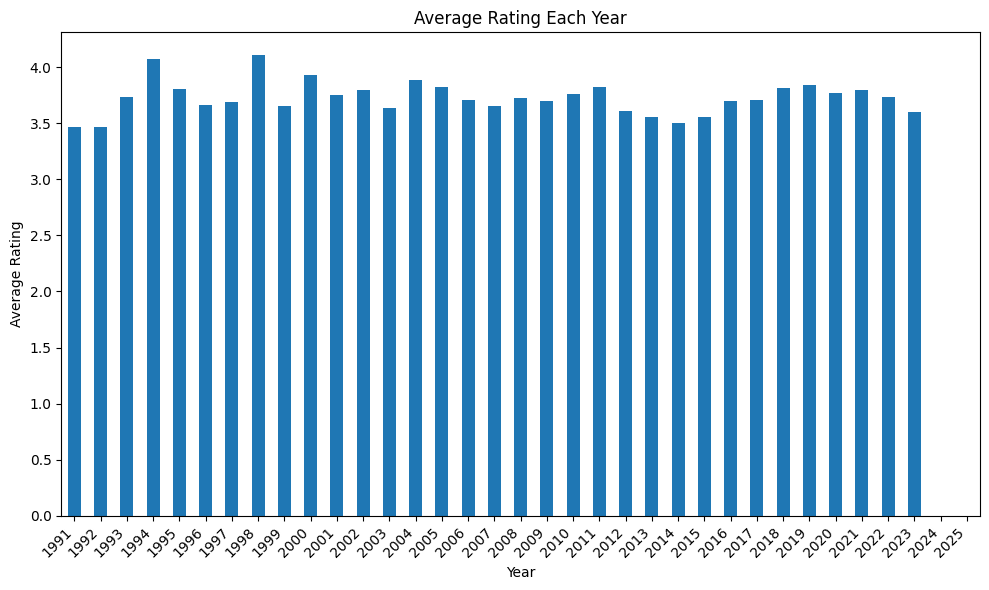

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Same as last plot, but for average rating:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df_filtered = df[df['Release Date'].dt.year >= 1990]
avg_rating_per_year = df_filtered.groupby(df_filtered['Release Date'].dt.year)['Rating'].mean()

plt.figure(figsize=(10, 6))
avg_rating_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Each Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Combine with the following dataset to visualize sales?? https://www.kaggle.com/datasets/gregorut/videogamesales 

# Applying TODOS

## 1) adjust dataset

In [41]:
from ast import literal_eval
import pandas as pd

df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)


df_exploded = df.explode('Genres')

df_exploded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3636 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         3636 non-null   int64         
 1   Title              3636 non-null   object        
 2   Release Date       3636 non-null   datetime64[ns]
 3   Team               3635 non-null   object        
 4   Rating             3616 non-null   float64       
 5   Times Listed       3636 non-null   object        
 6   Number of Reviews  3636 non-null   object        
 7   Genres             3633 non-null   object        
 8   Summary            3636 non-null   object        
 9   Reviews            3636 non-null   object        
 10  Plays              3636 non-null   object        
 11  Playing            3636 non-null   object        
 12  Backlogs           3636 non-null   object        
 13  Wishlist           3636 non-null   object        
dtypes: datetime64

In [42]:
from ast import literal_eval
import pandas as pd

df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)

df_exploded = df.explode('Genres') # create row for each genre in row's list of genres
genres_dummies = pd.get_dummies(df_exploded['Genres']) # one hot encoding thing...

genres_aggregated = genres_dummies.groupby(genres_dummies.index).sum() # recombine rows that were exploded

df = pd.concat([df, genres_aggregated], axis=1)
df.drop('Genres', axis=1, inplace=True)

df.info()

# df.to_csv('games_genres_expanded.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1509 non-null   int64         
 1   Title                1509 non-null   object        
 2   Release Date         1509 non-null   datetime64[ns]
 3   Team                 1508 non-null   object        
 4   Rating               1497 non-null   float64       
 5   Times Listed         1509 non-null   object        
 6   Number of Reviews    1509 non-null   object        
 7   Summary              1509 non-null   object        
 8   Reviews              1509 non-null   object        
 9   Plays                1509 non-null   object        
 10  Playing              1509 non-null   object        
 11  Backlogs             1509 non-null   object        
 12  Wishlist             1509 non-null   object        
 13  Adventure            1509 non-null   i

## 2.) Breakdown bars by genre

## 3.) Add interactive component, genre toggling and date scrollbar

In [226]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from ast import literal_eval
import plotly.offline as offline



df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)


def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

# Apply the custom function to the 'Value' column
df['Plays'] = df['Plays'].apply(convert_to_int)

df = df.explode('Genres').dropna(subset=['Genres'])


# Save the updated DataFrame to a CSV file
# df.to_csv('game_genres.csv', index=False)

df['Year'] = df['Release Date'].apply(lambda x: x.strftime('%Y'))
# avg_rating_per_date_genre = df.groupby(['Year', 'Genres'])['Rating'].mean().unstack().reset_index()
avg_rating_per_date_genre = df.groupby(['Year', 'Genres'])['Plays'].sum().unstack().reset_index()


fig = px.bar(avg_rating_per_date_genre, x='Year', y=avg_rating_per_date_genre.columns[1:],
             title='Total Plays by Genre Over Time',
             labels={'Release Date': 'Release Date', 'value': 'Total Plays', 'variable': 'Genre'},
             barmode='stack'
            )

fig.update_layout(xaxis_tickangle=-45)
fig.show()

offline.plot(fig, filename="plays_by_genre.html", auto_open=False)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



'plays_by_genre.html'

# FIXME: I can't figure out what is wrong with teams column...

In [150]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from ast import literal_eval


df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
# print(df['Team'].unique())

df['Team'] = df['Team'].apply(literal_eval)


def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

# df.to_csv('game_genres.csv', index=False)

df['Year'] = df['Release Date'].apply(lambda x: x.strftime('%Y'))
# avg_rating_per_date_genre = df.groupby(['Year', 'Genres'])['Rating'].mean().unstack().reset_index()
avg_rating_per_date_genre = df.groupby(['Year', 'Teams'])['Plays'].sum().unstack().reset_index()


fig = px.bar(avg_rating_per_date_genre, x='Year', y=avg_rating_per_date_genre.columns[1:],
             title='Total Plays by Teams Over Time',
             labels={'Release Date': 'Release Date', 'value': 'Total Teams', 'variable': 'Team'},
             barmode='stack'
            )

fig.update_layout(xaxis_tickangle=-45)
fig.show()

["['Bandai Namco Entertainment', 'FromSoftware']" "['Supergiant Games']"
 "['Nintendo', 'Nintendo EPD Production Group No. 3']"
 "['tobyfox', '8-4']" "['Team Cherry']" "['Mojang Studios']"
 "['OMOCAT', 'PLAYISM']" "['Nintendo', 'MercurySteam']" "['InnerSloth']"
 "['PlatinumGames', 'Square Enix']" "['Atlus USA', 'Atlus']"
 "['BlueTwelve Studio', 'Annapurna Interactive']"
 "['Sony Interactive Entertainment', 'SIE Santa Monica Studio']"
 "['Valve', 'Electronic Arts']"
 "['FromSoftware', 'Sony Computer Entertainment']"
 "['Extremely OK Games', 'Maddy Makes Games']"
 "['Ryū Ga Gotoku Studios', 'Sega']"
 "['Take-Two Interactive', 'Rockstar Games']" "['Nintendo']"
 "['Nintendo', 'Game Freak']" "['Tango Gameworks', 'Bethesda Softworks']"
 "['Konami', 'PlatinumGames']" "['Rockstar North', 'Rockstar Games']"
 "['CD Projekt RED']" "['Monolith Soft', 'Nintendo']"
 "['HAL Laboratory', 'Nintendo']" "['ZA/UM']"
 "['Insomniac Games', 'Sony Interactive Entertainment']"
 "['Toylogic', 'Square Enix']" "[

ValueError: malformed node or string: nan

# Getting Lists

In [227]:
from ast import literal_eval
from gettext import npgettext
import pandas as pd
from datetime import datetime
import numpy as np


df = pd.read_csv('Dataset/games.csv')
df = df[df['Release Date'] != 'releases on TBD']
df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].dropna().apply(literal_eval)

df['Genres'] = df['Genres'].explode().dropna()

df.head()
# np.savetxt("game_genres.csv", team_values, delimiter=',', fmt='%s')



ValueError: cannot reindex on an axis with duplicate labels

In [89]:
from ast import literal_eval
import pandas as pd
from datetime import datetime

df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)

df = df.explode('Genres').dropna(subset=['Genres'])  # Drop rows with NaN in 'Genres' column


# Save the updated DataFrame to a CSV file
# df.to_csv('game_genres.csv', index=False)

df.head()


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Brawler,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,Indie,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


# Genre vs Total Plays

In [228]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from ast import literal_eval

df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Genres'] = df['Genres'].apply(literal_eval)

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

df = df.explode('Genres').dropna(subset=['Genres'])

df['Year'] = df['Release Date'].apply(lambda x: x.strftime('%Y'))
avg_plays_per_genre_year = df.groupby(['Genres', 'Year'])['Plays'].sum().unstack().reset_index()

fig = px.bar(avg_plays_per_genre_year, x=avg_plays_per_genre_year.columns[1:], y='Genres',
             title='Total Plays by Genre Over Time',
             labels={'value': 'Total Plays', 'variable': 'Year'},
             barmode='stack'
            )

fig.update_layout(xaxis_tickangle=-45)
fig.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# FIXME: struggling with the years, and moving the bars smoothly...

In [184]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from ast import literal_eval

df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year
df['Day'] = df['Release Date'].dt.day

df['Genres'] = df['Genres'].apply(literal_eval)

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

df = df.explode('Genres').dropna(subset=['Genres'])

total_plays_per_genre_year = df.groupby(['Year', 'Genres'])['Plays'].sum().reset_index()

top_genres_by_year = {}
for year in df['Year'].unique():
    df_year = total_plays_per_genre_year[total_plays_per_genre_year['Year'] == year]
    top_genres_by_year[year] = df_year.groupby('Genres')['Plays'].sum().nlargest(10).index

df_top_genres = pd.DataFrame()
for year in df['Year'].unique():
    df_year = total_plays_per_genre_year[total_plays_per_genre_year['Year'] == year]
    df_year_top_genres = df_year[df_year['Genres'].isin(top_genres_by_year[year])]
    df_top_genres = pd.concat([df_top_genres, df_year_top_genres])

fig = px.bar(df_top_genres, x='Plays', y='Genres', color='Genres',
             title='Top 10 Genres by Total Plays for Each Year',
             labels={'Plays': 'Total Plays', 'Genres': 'Genre', 'Year': 'Year'},
             barmode='stack',
             animation_frame='Year',
             orientation='h'
            )

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Total Plays', yaxis_title='Genre',
                  showlegend=False,)

fig.show()


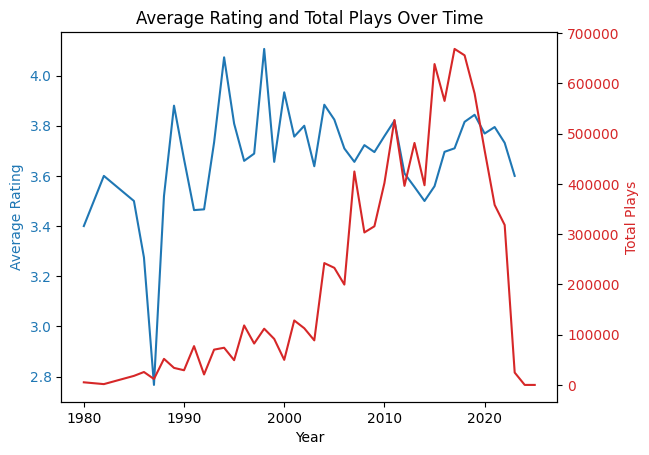

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Year', 'Rating', and 'Plays' columns
# Group by 'Year' and calculate the average rating and total plays

df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year


def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

avg_rating = df.groupby('Year')['Rating'].mean()
total_plays = df.groupby('Year')['Plays'].sum()

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot average rating on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color=color)
ax1.plot(avg_rating.index, avg_rating.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for total plays
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Plays', color=color)
ax2.plot(total_plays.index, total_plays.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show the plot
plt.title('Average Rating and Total Plays Over Time')
plt.show()


# TODO: fix order of years, slow down animation

In [204]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)

# Filter data up to 2023
df_filtered = df[df['Year'] <= 2023]

# Group by 'Year' and calculate the average rating and total plays
avg_rating = df_filtered.groupby('Year')['Rating'].mean()
total_plays = df_filtered.groupby('Year')['Plays'].sum()

# Create a figure with two y-axes
fig = go.Figure()

# Add scatter plot for average rating on the left y-axis
fig.add_trace(go.Scatter(x=avg_rating.index, y=avg_rating.values, mode='lines', name='Average Rating', line=dict(color='blue')))

# Add scatter plot for total plays on the right y-axis
fig.add_trace(go.Scatter(x=total_plays.index, y=total_plays.values, mode='lines', name='Total Plays', line=dict(color='red'), yaxis='y2'))

# Update layout with x-axis title and range slider
fig.update_layout(
    xaxis_title='Year',
    title='Average Rating and Total Plays Over Time',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
        ),
        type='category'  # Set x-axis type to category for discrete years
    ),
    yaxis=dict(
        title='Average Rating'
    ),
    yaxis2=dict(
        title='Total Plays',
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=1.1,  # Move legend to the right (increase x value for more distance)
        y=1.0,  # Keep legend at the top
        bgcolor='rgba(255, 255, 255, 0.5)',  # Set legend background color with transparency
    )
)

fig.show()

fig.write_html("avg_rating_vs_total_plays.html")



In [231]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

# Load your dataset
df = pd.read_csv('Dataset/games.csv')

df = df[df['Release Date'] != 'releases on TBD']

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df['Year'] = df['Release Date'].dt.year

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

df['Plays'] = df['Plays'].apply(convert_to_int)
df = df[df['Year'] <= 2023]

# Calculate average ratings by year
avg_ratings_by_year = df.groupby(['Year', 'Title'])['Rating'].mean().reset_index()

# Calculate overall average ratings by year
overall_avg_ratings_by_year = df.groupby('Year')['Rating'].mean().reset_index()

# Create a Dash app
app = dash.Dash(__name__)

# Define game titles for dropdown menu
game_titles = df['Title'].unique()

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='game-dropdown',
        options=[{'label': title, 'value': title} for title in game_titles],
        placeholder='Select game titles...',
        multi=True  # Allow multiple selections
    ),
    dcc.Graph(id='game-sales-plot')
])

# Define callback to update the plot based on the selected game titles
@app.callback(
    Output('game-sales-plot', 'figure'),
    [Input('game-dropdown', 'value')]
)
def update_plot(selected_games):
    if selected_games:
        # Filter the dataset based on the selected game titles
        filtered_df = avg_ratings_by_year[avg_ratings_by_year['Title'].isin(selected_games)]
        # Create a line plot for the selected game titles' average ratings
        fig = go.Figure()
        for game_title in selected_games:
            game_data = filtered_df[filtered_df['Title'] == game_title]
            fig.add_trace(go.Scatter(x=game_data['Year'], y=game_data['Rating'], mode='lines+markers', name=f'{game_title}'))
        
        # Add a line for overall average ratings with fixed color
        fig.add_trace(go.Scatter(x=overall_avg_ratings_by_year['Year'], y=overall_avg_ratings_by_year['Rating'], mode='lines', name='Overall Average Rating', line=dict(color='black')))
        
        fig.update_layout(title='Ratings Comparison', xaxis_title='Year', yaxis_title='Average Rating')
        return fig
    else:
        return {}
    


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


WISHLIST ONE

TOP GAME TEAMS

WORST GAME DEVELOPERS